In [ ]:
!git clone https://github.com/shimanaseri/Zernike_feature_extraction.git

Cloning into 'Zernike_feature_extraction'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 99 (delta 44), reused 8 (delta 2), pack-reused 0
Receiving objects: 100% (99/99), 35.56 KiB | 1.42 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
!rm -f -r /content/Zernike_feature_extraction

In [ ]:
!pip install -r /content/Zernike_feature_extraction/requirements.txt
!pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

ERROR: Could not find a version that satisfies the requirement cupy-cuda100 (from versions: none)
ERROR: No matching distribution found for cupy-cuda100
Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 574.6/574.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Data Preparations

In [ ]:
!gdown 1g25ltlhjvhhf3gzDaY-kXJIrtmMk-MtG
import rarfile
import os
import shutil

rar_file_path = '/content/Copy_of_QS_OK_TOTAL-with_duplicateed_data.rar'
folder_path = '/content/Dataset'

# Extract the rar file to the specified folder
with rarfile.RarFile(rar_file_path, 'r') as rar_ref:
    rar_ref.extractall(folder_path)

orig_dir = '/content/Dataset/QS_OK_TOTAL-whit duplicate data'

In [ ]:
from Zernike_feature_extraction.all_in_one import CombinedImageProcessor

processor = CombinedImageProcessor(base_dir='/content/output',verbose=False)

image_data = processor.process_dataset(orig_dir)
processor.zip_segments()

## Training preparation:

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout, Lambda
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

In [ ]:
!gdown 1-1uTAMidk2H_nkeMz0XmiGGaU5ZuB0je
!gdown 1OXJYzrNHFiehZHuGYN0R9g4AC9J4YhXJ
!gdown 1-4fV05DzkOEsaeUFjVAe3ZyI3XogkEFD
!gdwon 1_70AR5NMELj0AnLM7NMaTmeIaQSneyOp

Downloading...
From: https://drive.google.com/uc?id=1-1uTAMidk2H_nkeMz0XmiGGaU5ZuB0je
To: /content/ze_image_data_all.csv
100% 21.9M/21.9M [00:00<00:00, 173MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OXJYzrNHFiehZHuGYN0R9g4AC9J4YhXJ
To: /content/Aras_Farabi_lables.xlsx - Sheet1.csv
100% 327k/327k [00:00<00:00, 119MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-4fV05DzkOEsaeUFjVAe3ZyI3XogkEFD
From (redirected): https://drive.google.com/uc?id=1-4fV05DzkOEsaeUFjVAe3ZyI3XogkEFD&confirm=t&uuid=fbb18169-6bff-441e-86f9-f69a0d0055c5
To: /content/segmented_images.zip
100% 196M/196M [00:03<00:00, 49.8MB/s]
/bin/bash: line 1: gdwon: command not found


In [ ]:
import pandas as pd

with_color = pd.read_csv('/content/ze_image_data_all.csv')

def convert_zernike_to_array(zernike_str):
    # Removing unwanted characters and splitting by space
    cleaned_str = zernike_str.replace('\n', ' ').replace('[', '').replace(']', '')
    # Splitting the string into a list of strings, each representing a float
    str_list = cleaned_str.split()
    # Converting each string in the list to a float
    num_list = [float(item) for item in str_list]
    return np.array(num_list)

with_color['HSV Zernike Moments'] = with_color['HSV Zernike Moments'].apply(convert_zernike_to_array)

In [ ]:
filtered_data = with_color[~with_color['label_6'].isin([2, 3, 4, 6])]

def map_labels(x):
    if x in [1]:
        return 0
    elif x in [5]:
        return 1

filtered_data['label_2'] = filtered_data["label_6"].apply(map_labels)

<ipython-input-4-7fe40f88b001>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['label_2'] = filtered_data["label_6"].apply(map_labels)


In [ ]:
import zipfile
import os

# Specify the path to the zip file and the folder where you want to extract the files
zip_file_path = '/content/segmented_images.zip'
base_dir = '/content'

# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

filtered_data['Image Path'] = filtered_data.apply(lambda row: os.path.join(base_dir, row['Segment'], row['File Name']), axis=1)

<ipython-input-5-62194489dafc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Image Path'] = filtered_data.apply(lambda row: os.path.join(base_dir, row['Segment'], row['File Name']), axis=1)


In [ ]:
with_color_data_axial_curvature = filtered_data[filtered_data['Segment'] == 'AXIAL Curvature']
with_color_data_corneal_thickness = filtered_data[filtered_data['Segment'] == 'Corneal Thickness']
with_color_data_elevation_front = filtered_data[filtered_data['Segment'] == 'Elevation (Front)']
with_color_data_elevation_back = filtered_data[filtered_data['Segment'] == 'Elevation (Back)']

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D scatter plot
from sklearn.manifold import TSNE
import cv2

# Function to preprocess images
def preprocess_image(image_path, target_size=(150, 150)):
    image = cv2.imread(image_path)
    if image is None:
        return None
    resized_image = cv2.resize(image, target_size)
    flattened_image = resized_image.flatten()
    return flattened_image

# Apply the function to preprocess images for each image in the DataFrame
with_color_data_corneal_thickness['Image Vector'] = with_color_data_corneal_thickness['Image Path'].apply(preprocess_image)


all_image = np.array(with_color_data_corneal_thickness['Image Vector'].tolist())

# Apply t-SNE and visualize in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_raw_data_3d = tsne.fit_transform(all_image)

<ipython-input-51-b4829067396a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_color_data_corneal_thickness['Image Vector'] = with_color_data_corneal_thickness['Image Path'].apply(preprocess_image)


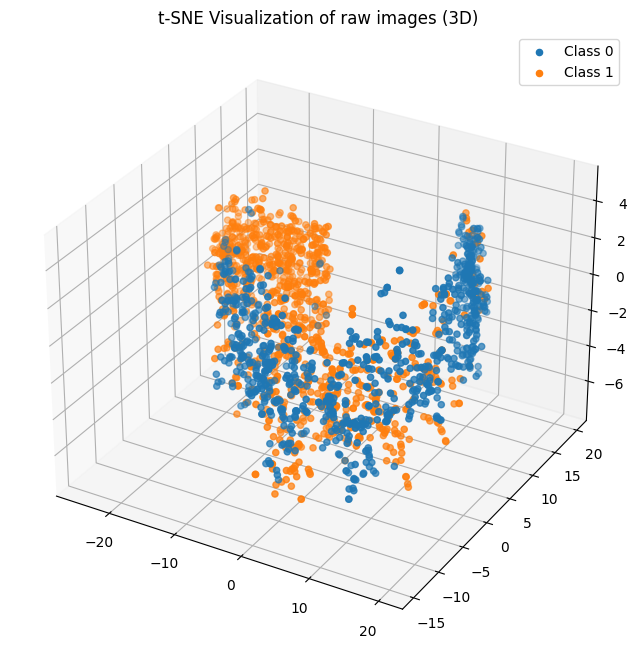

In [ ]:
# Plot the t-SNE results in 3D
all_labels = with_color_data_corneal_thickness['label_2'].values

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(cls_number):
    ax.scatter(tsne_raw_data_3d[all_labels == i, 0], tsne_raw_data_3d[all_labels == i, 1], tsne_raw_data_3d[all_labels == i, 2], label=f'Class {i}')

ax.set_title('t-SNE Visualization of raw images (3D)')
ax.legend()
plt.show()

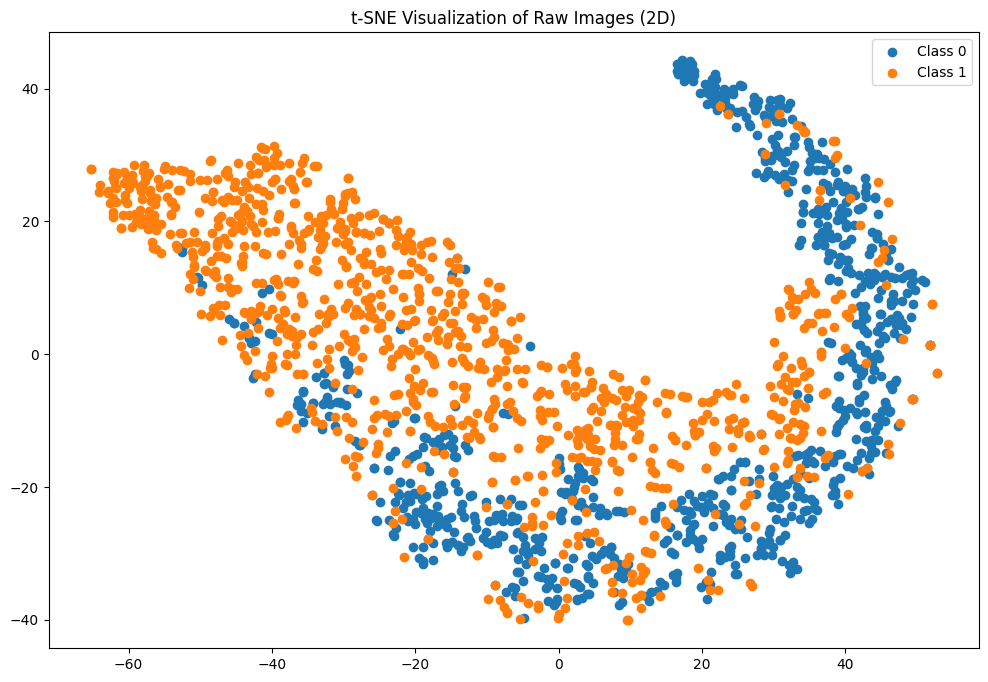

In [ ]:
# Apply t-SNE and visualize in 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_raw_data = tsne.fit_transform(all_image)

# Plot the t-SNE results in 2D
fig, ax = plt.subplots(figsize=(12, 8))
cls_number = 2
for i in range(cls_number):
    ax.scatter(tsne_raw_data[all_labels == i, 0], tsne_raw_data[all_labels == i, 1], label=f'Class {i}')

ax.set_title('t-SNE Visualization of Raw Images (2D)')
ax.legend()
plt.show()

In [ ]:
# Extracting the Zernike Moments arrays as the input data for clustering
X_1 = np.stack(with_color_data_axial_curvature['HSV Zernike Moments'].values)
X_2 = np.stack(with_color_data_elevation_front['HSV Zernike Moments'].values)
X_3 = np.stack(with_color_data_elevation_back['HSV Zernike Moments'].values)
X_4 = np.stack(with_color_data_corneal_thickness['HSV Zernike Moments'].values)

X_expand = np.hstack((X_1, X_4, X_2, X_3))

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

cls_number = 2

le = LabelEncoder()
y = with_color_data_corneal_thickness['label_2'].values
Y_encoder = le.fit_transform(with_color_data_corneal_thickness['label_2'].values)
Y_binary = to_categorical(Y_encoder, cls_number)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D scatter plot
from sklearn.manifold import TSNE

# Apply t-SNE and visualize in 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_ze_data_3d = tsne.fit_transform(X_expand)

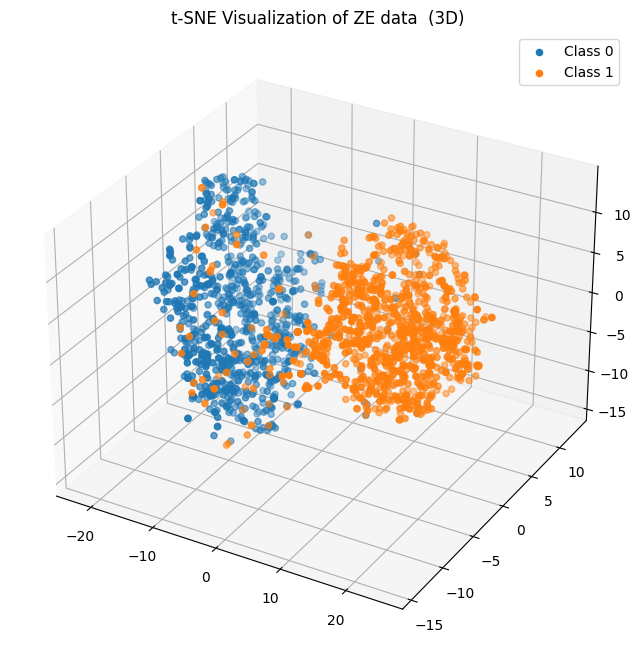

In [ ]:
all_labels = y

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(cls_number):
    ax.scatter(tsne_ze_data_3d[all_labels == i, 0], tsne_ze_data_3d[all_labels == i, 1], tsne_ze_data_3d[all_labels == i, 2], label=f'Class {i}')

ax.set_title('t-SNE Visualization of ZE data  (3D)')
ax.legend()
plt.show()

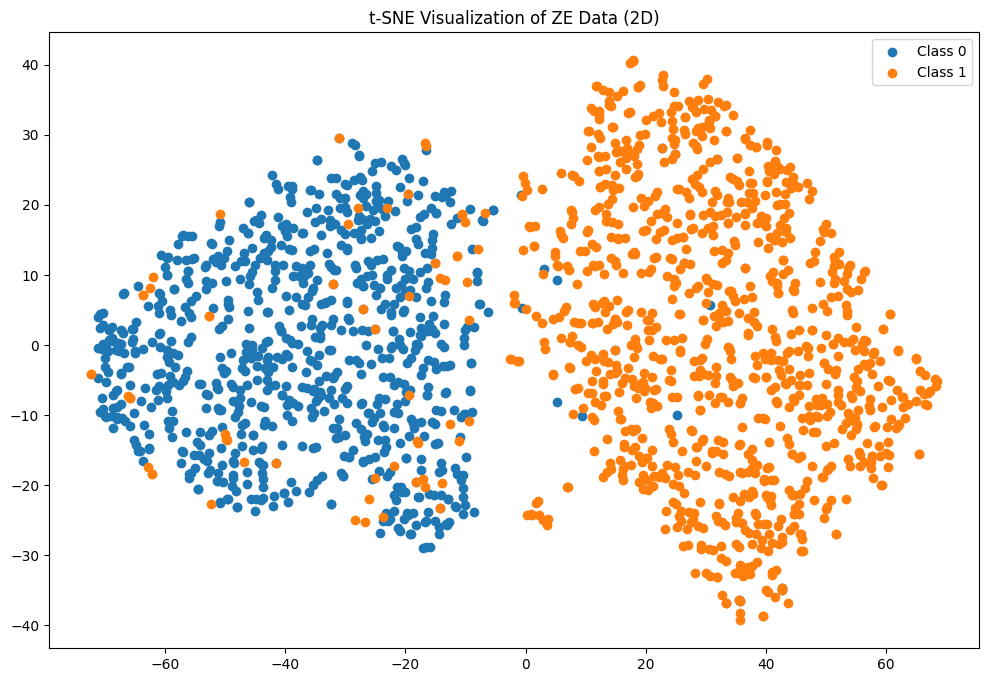

In [ ]:
# Apply t-SNE and visualize in 3D
tsne = TSNE(n_components=2, random_state=42)
tsne_ze_data = tsne.fit_transform(X_expand)

# Plot the t-SNE results in 2D
fig, ax = plt.subplots(figsize=(12, 8))
cls_number = 2
for i in range(cls_number):
    ax.scatter(tsne_ze_data[all_labels == i, 0], tsne_ze_data[all_labels == i, 1], label=f'Class {i}')

ax.set_title('t-SNE Visualization of ZE Data (2D)')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette = silhouette_score(all_image, y)
print("Silhouette Score of main data:", silhouette)

silhouette = silhouette_score(X_expand, y)
print("Silhouette Score of ZE data:", silhouette)

print()
# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(all_image, y)
print("Calinski-Harabasz Index of main data:", calinski_harabasz)

calinski_harabasz = calinski_harabasz_score(X_expand, y)
print("Calinski-Harabasz Index of ZE data:", calinski_harabasz)

print()

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(all_image, y)
print("Davies-Bouldin Index of main data:", davies_bouldin)

davies_bouldin = davies_bouldin_score(X_expand, y)
print("Davies-Bouldin Index of ZE data:", davies_bouldin)


Silhouette Score of main data: 0.1376079245562907
Silhouette Score of ZE data: 0.15729613315845278

Calinski-Harabasz Index of main data: 375.36680565928253
Calinski-Harabasz Index of ZE data: 376.94014380486243

Davies-Bouldin Index of main data: 2.095008884008694
Davies-Bouldin Index of ZE data: 2.156659665936587


# Training Zernike features

In [ ]:
from sklearn.model_selection import train_test_split
X_train_zm, X_test_zm, Y_train_zm, Y_test_zm = train_test_split(X_expand, Y_binary, test_size=0.2, random_state=21)
descriptor_shape = X_expand[0].shape



print('Shape of descriptors', X_train_zm.shape, 'Type of descriptor', type(X_train_zm))
print('Shape of descriptors', X_test_zm.shape, 'Type of descriptor', type(X_test_zm))

descriptor_shape = X_train_zm[0].shape
print('Input shape of descripor is:', descriptor_shape)

Shape of descriptors (1502, 288) Type of descriptor <class 'numpy.ndarray'>
Shape of descriptors (376, 288) Type of descriptor <class 'numpy.ndarray'>
Input shape of descripor is: (288,)


## MLP

In [ ]:
# Define the model architecture
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(288, input_shape=descriptor_shape, activation='elu'))
model.add(Dense(cls_number, activation='softmax'))
print(model.summary())


from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y),
                                        y = y
                                    )
class_weights = dict(zip(np.unique(y), class_weights))

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.9,
                              patience=3,
                              min_lr=0.000001, verbose=1)

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)


import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()

history = model.fit(X_train_zm, Y_train_zm,
                    batch_size=32,
                    epochs=150,
                    validation_data=(X_test_zm, Y_test_zm),
                    callbacks=[reduce_lr, early_stopping],
                    class_weight=class_weights
                    )
end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 288)               83232     
                                                                 
 dense_1 (Dense)             (None, 2)                 578       
                                                                 
Total params: 83810 (327.38 KB)
Trainable params: 83810 (327.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/150
47/47 [==============================] - 1s 8ms/step - loss: 0.6671 - accuracy: 0.6591 - val_loss: 0.6257 - val_accuracy: 0.8564 - lr: 1.0000e-04
Epoch 2/150
47/47 [==============================] - 0s 4ms/step - loss: 0.6024 - accuracy: 0.9241 - val_loss: 0.5612 - val_accuracy: 0.9548 - lr: 1.0000e-04
Epoch 3/150
47/47 [==============================] - 0s 4ms/step - loss: 0.5414 - accuracy: 0

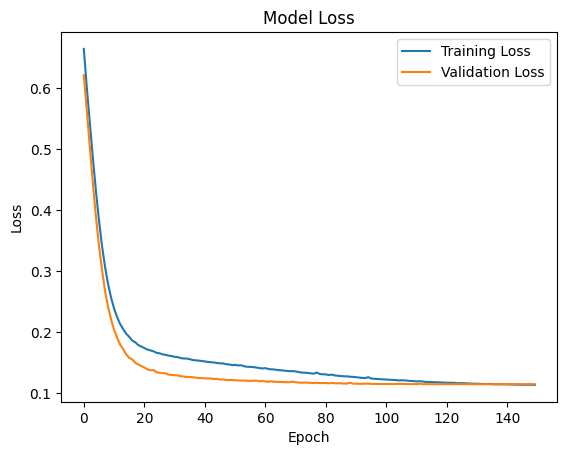

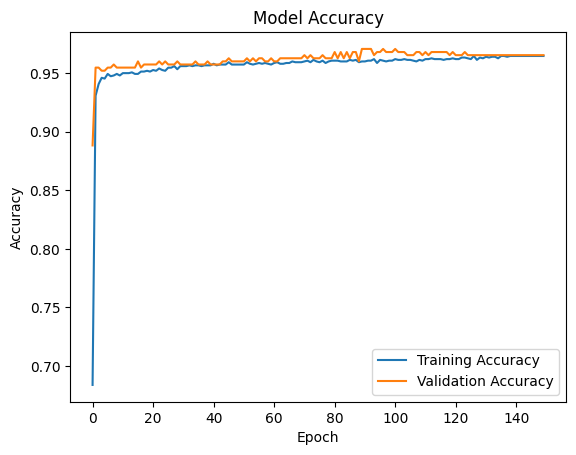

In [ ]:
# Plot the training and validation loss over epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


12/12 [==============================] - 0s 3ms/step


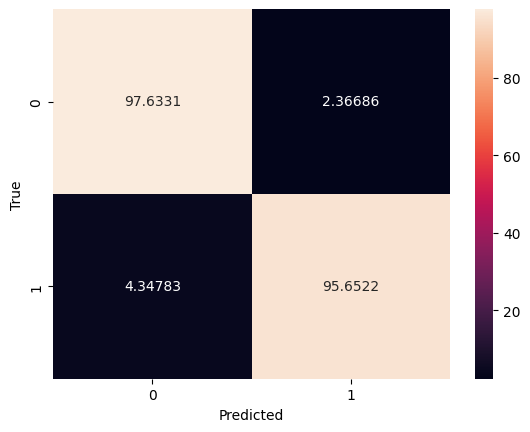

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       169
           1       0.98      0.96      0.97       207

    accuracy                           0.97       376
   macro avg       0.96      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376

Test AUC: 0.9664265500385902
Test Recall: 0.9654255319148937
Test F1-score: 0.9654255319148937
Test Precision: 0.9654255319148937


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test_zm)
Y_pred_classes = np.round(Y_pred)
Y_test_bin = np.argmax(Y_test_zm, axis=1)
Y_pred_bin =np.argmax(Y_pred,axis=1)
cm = confusion_matrix(Y_test_bin, Y_pred_bin)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(cm_percentage, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
# Print classification report
print(classification_report(Y_test_bin, Y_pred_bin))

# Additional metrics
auc_score = roc_auc_score(Y_test_zm, Y_pred_classes, multi_class='ovr')
recall = recall_score(Y_test_bin, Y_pred_bin, average='micro')
f1 = f1_score(Y_test_bin, Y_pred_bin, average='micro')
precision = precision_score(Y_test_bin, Y_pred_bin, average='micro')

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

In [ ]:
from tensorflow.keras import backend as K
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library
from tensorflow.keras.models import Model

# Get the intermediate output
intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[-1].output)
intermediate_output_train = intermediate_layer_model.predict(X_expand)

# Concatenate train and test intermediate outputs for t-SNE visualization
tsne_input = intermediate_output_train
tsne_labels = all_labels

59/59 [==============================] - 0s 2ms/step


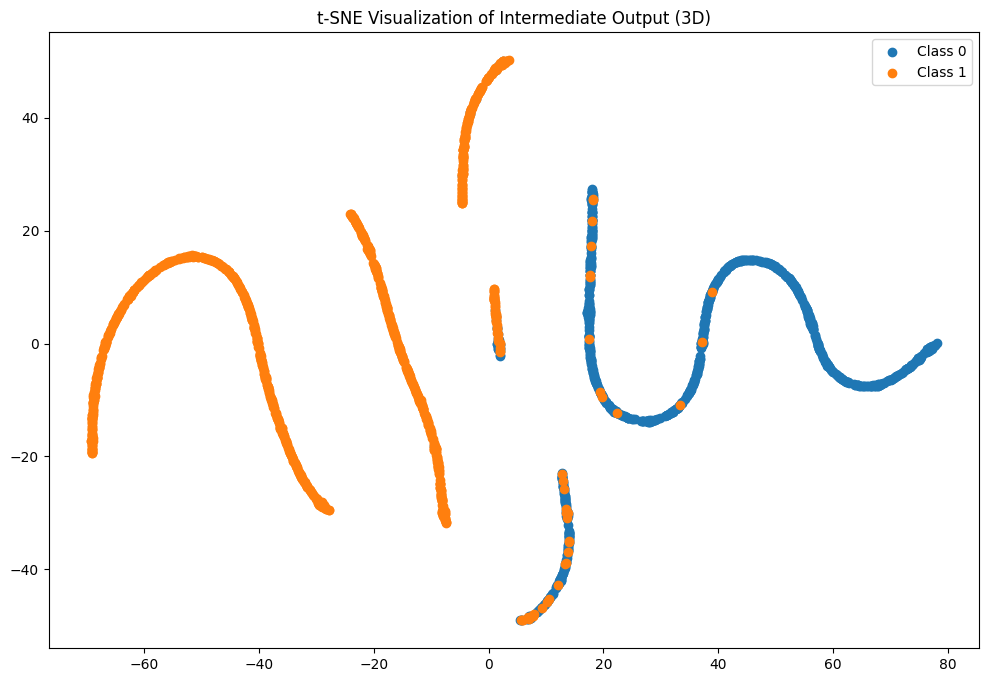

In [ ]:
# Apply t-SNE for dimensionality reduction in 3D
tsne = TSNE(n_components=2, random_state=42)
tsne_result_nn = tsne.fit_transform(tsne_input)

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

for i in range(cls_number):
    ax.scatter(tsne_result_nn[tsne_labels == i, 0], tsne_result_nn[tsne_labels == i, 1], label=f'Class {i}')

ax.set_title('t-SNE Visualization of Intermediate Output (3D)')
ax.legend()
plt.show()

### with renyi loss

In [ ]:
import tensorflow as tf
from keras import backend as K

def renyi_entropy(alpha, y_true, y_pred):
    """Calculates the Renyi entropy of the predicted distribution"""
    term = tf.reduce_sum(tf.pow(y_pred, alpha), axis=-1)
    renyi_ent = (1.0 / (1.0 - alpha)) * tf.math.log(term)
    return renyi_ent

def renyi_divergence(alpha, y_true, y_pred):
    """Calculates the Renyi divergence between true and predicted distributions"""
    p = y_true
    q = y_pred
    p_alpha = tf.pow(p, alpha)
    q_alpha = tf.pow(q, alpha - 1)
    term = tf.reduce_sum(p_alpha / q_alpha, axis=-1)
    renyi_div = (1.0 / (alpha - 1.0)) * tf.math.log(term)
    return renyi_div

def custom_loss(alpha):
    """Custom loss function based on Renyi entropy and divergence"""
    def loss(y_true, y_pred):
        entropy_loss = renyi_entropy(alpha, y_true, y_pred)
        divergence_loss = renyi_divergence(alpha, y_true, y_pred)
        return entropy_loss + divergence_loss
    return loss

alpha = 0.15


In [ ]:
# Define the model architecture
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
import keras.backend as K


model_1 = Sequential()
model_1.add(Dense(288, input_shape=descriptor_shape, activation='elu'))
model_1.add(Dense(cls_number, activation='softmax'))
print(model_1.summary())


from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y),
                                        y = y
                                    )
class_weights = dict(zip(np.unique(y), class_weights))

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.9,
                              patience=3,
                              min_lr=0.000001, verbose=1)

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min', restore_best_weights=True)


import keras
opt = keras.optimizers.Adam(learning_rate=0.0007)

model_1.compile(optimizer=opt,
                loss=custom_loss(alpha),
                metrics=['accuracy'])

start_time = time.time()

history = model_1.fit(X_train_zm, Y_train_zm,
                    batch_size=32,
                    epochs=9,
                    validation_data=(X_test_zm, Y_test_zm),
                    callbacks=[reduce_lr, early_stopping],
                    class_weight=class_weights
                    )
end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 288)               83232     
                                                                 
 dense_7 (Dense)             (None, 2)                 578       
                                                                 
Total params: 83810 (327.38 KB)
Trainable params: 83810 (327.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/9
47/47 [==============================] - 1s 7ms/step - loss: 1.1895 - accuracy: 0.8569 - val_loss: 0.9786 - val_accuracy: 0.9495 - lr: 7.0000e-04
Epoch 2/9
47/47 [==============================] - 0s 4ms/step - loss: 0.8735 - accuracy: 0.9447 - val_loss: 0.7269 - val_accuracy: 0.9654 - lr: 7.0000e-04
Epoch 3/9
47/47 [==============================] - 0s 4ms/step - loss: 0.7189 - accuracy: 0.949

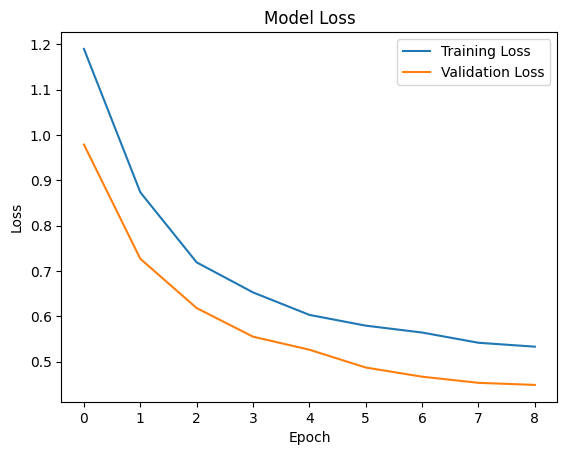

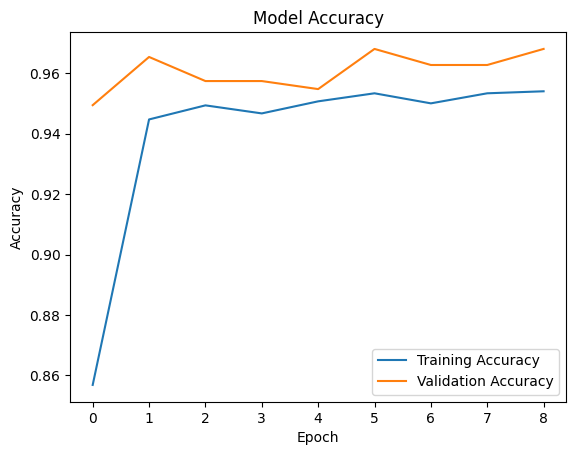

In [ ]:
# Plot the training and validation loss over epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


12/12 [==============================] - 0s 3ms/step


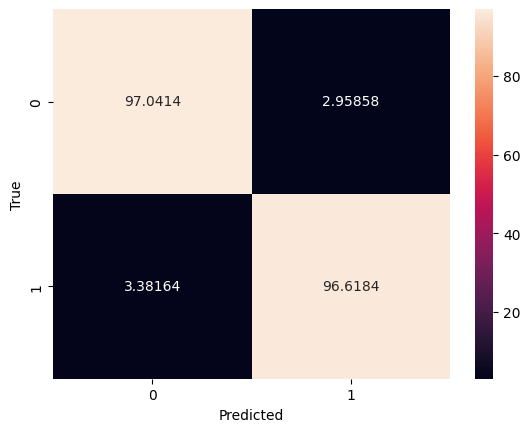

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       169
           1       0.98      0.97      0.97       207

    accuracy                           0.97       376
   macro avg       0.97      0.97      0.97       376
weighted avg       0.97      0.97      0.97       376

Test AUC: 0.9682988880313295
Test Recall: 0.9680851063829787
Test F1-score: 0.9680851063829787
Test Precision: 0.9680851063829787


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model_1.predict(X_test_zm)
Y_pred_classes = np.round(Y_pred)
Y_test_bin = np.argmax(Y_test_zm, axis=1)
Y_pred_bin =np.argmax(Y_pred,axis=1)
cm = confusion_matrix(Y_test_bin, Y_pred_bin)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(cm_percentage, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
# Print classification report
print(classification_report(Y_test_bin, Y_pred_bin))

# Additional metrics
auc_score = roc_auc_score(Y_test_zm, Y_pred_classes, multi_class='ovr')
recall = recall_score(Y_test_bin, Y_pred_bin, average='micro')
f1 = f1_score(Y_test_bin, Y_pred_bin, average='micro')
precision = precision_score(Y_test_bin, Y_pred_bin, average='micro')

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)
Y_pred_bin_max =np.max(Y_pred,axis=1)
Y_pred_bin_min =np.min(Y_pred,axis=1)

In [ ]:
from tensorflow.keras import backend as K
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library
from tensorflow.keras.models import Model

# Get the intermediate output
intermediate_layer_model = Model(inputs=model_1.input, outputs=model_1.layers[-1].output)
intermediate_output_train = intermediate_layer_model.predict(X_expand)

# Concatenate train and test intermediate outputs for t-SNE visualization
tsne_input = intermediate_output_train
tsne_labels = all_labels

59/59 [==============================] - 0s 3ms/step


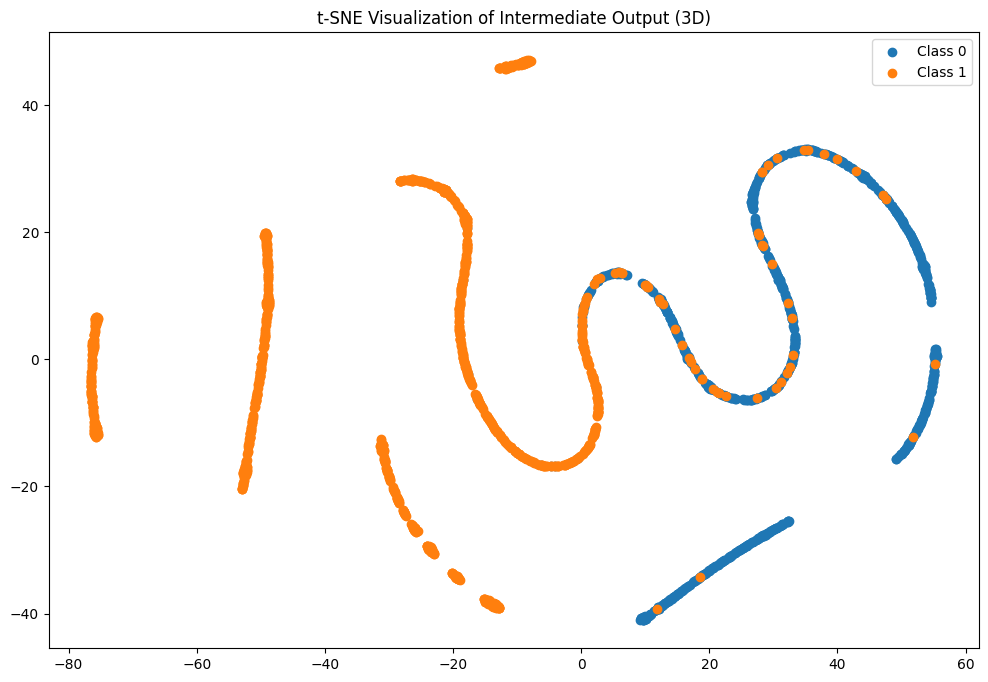

In [ ]:
# Apply t-SNE for dimensionality reduction in 3D
tsne = TSNE(n_components=2, random_state=42)
tsne_result_nn = tsne.fit_transform(tsne_input)

# Plot the t-SNE results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

for i in range(cls_number):
    ax.scatter(tsne_result_nn[tsne_labels == i, 0], tsne_result_nn[tsne_labels == i, 1], label=f'Class {i}')

ax.set_title('t-SNE Visualization of Intermediate Output (2D)')
ax.legend()
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [8.25, 8.5, 8.75, 9],
    'gamma': ['scale'],
    'kernel': ['linear', 'rbf', 'poly']
}

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y),
                                        y = y
                                    )
class_weights = dict(zip(np.unique(y), class_weights))

Y_train_zm_single = np.argmax(Y_train_zm, axis=1)
Y_test_zm_single = np.argmax(Y_test_zm, axis=1)

start_time = time.time()
# Initialize the SVM model with GridSearchCV
svm_model = GridSearchCV(SVC(class_weight=class_weights, probability=True), param_grid, refit=True, verbose=3)

svm_model.fit(X_train_zm, Y_train_zm_single)

end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

# Best parameters from GridSearchCV
print("Best Parameters:", svm_model.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=8.25, gamma=scale, kernel=linear;, score=0.953 total time=   0.3s
[CV 2/5] END C=8.25, gamma=scale, kernel=linear;, score=0.950 total time=   0.3s
[CV 3/5] END C=8.25, gamma=scale, kernel=linear;, score=0.960 total time=   0.3s
[CV 4/5] END C=8.25, gamma=scale, kernel=linear;, score=0.950 total time=   0.3s
[CV 5/5] END C=8.25, gamma=scale, kernel=linear;, score=0.977 total time=   0.3s
[CV 1/5] END ...C=8.25, gamma=scale, kernel=rbf;, score=0.947 total time=   0.5s
[CV 2/5] END ...C=8.25, gamma=scale, kernel=rbf;, score=0.950 total time=   0.5s
[CV 3/5] END ...C=8.25, gamma=scale, kernel=rbf;, score=0.957 total time=   0.5s
[CV 4/5] END ...C=8.25, gamma=scale, kernel=rbf;, score=0.953 total time=   0.5s
[CV 5/5] END ...C=8.25, gamma=scale, kernel=rbf;, score=0.973 total time=   0.6s
[CV 1/5] END ..C=8.25, gamma=scale, kernel=poly;, score=0.944 total time=   0.4s
[CV 2/5] END ..C=8.25, gamma=scale, kernel=poly;

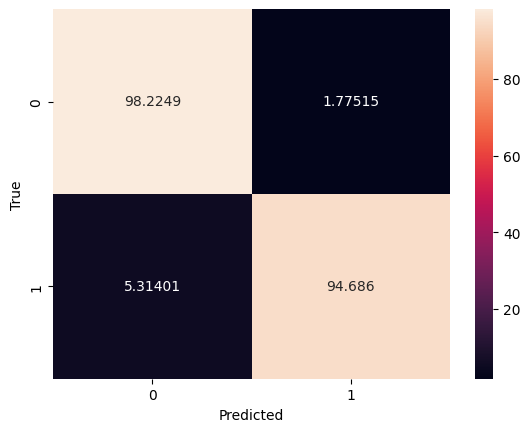

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       169
           1       0.98      0.95      0.97       207

    accuracy                           0.96       376
   macro avg       0.96      0.96      0.96       376
weighted avg       0.96      0.96      0.96       376

Test AUC: 0.9645542120458508
Test Recall: 0.9627659574468085
Test F1-score: 0.9627659574468085
Test Precision: 0.9627659574468085


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = svm_model.predict(X_test_zm)

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test_zm_single, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(cm_percentage, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
# Print classification report
print(classification_report(Y_test_zm_single, y_pred))

# Additional metrics
auc_score = roc_auc_score(Y_test_zm_single, y_pred, multi_class='ovr')
recall = recall_score(Y_test_zm_single, y_pred, average='micro')
f1 = f1_score(Y_test_zm_single, y_pred, average='micro')
precision = precision_score(Y_test_zm_single, y_pred, average='micro')

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

support_vectors = svm_model.best_estimator_.support_vectors_

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_expand)
support_vectors_tsne = tsne.fit_transform(support_vectors)

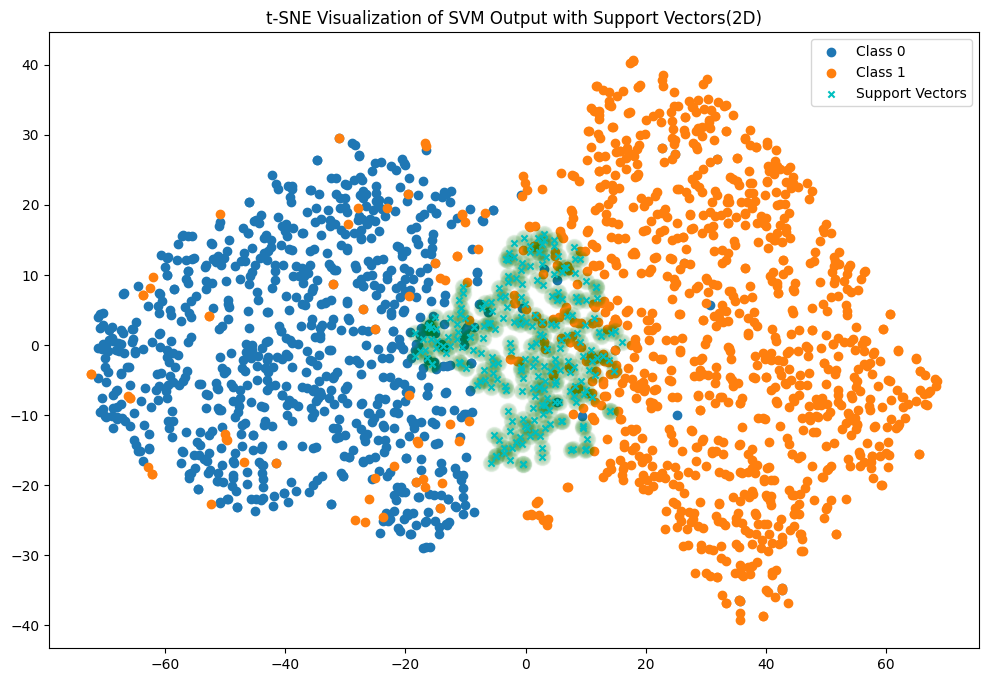

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# Plotting the data points
for i in range(cls_number):
    ax.scatter(X_train_tsne[y == i, 0], X_train_tsne[y == i, 1], label=f'Class {i}')

# Highlighting the support vectors with a glow effect
n_glow_layers = 15  # Number of layers to create the glow effect
glow_alpha = 0.02  # Transparency of each glow layer

for i in range(n_glow_layers, 0, -1):
    ax.scatter(support_vectors_tsne[:, 0], support_vectors_tsne[:, 1], c='g', s=(i * 10), alpha=glow_alpha)

# Plotting the main support vectors with increased size
ax.scatter(support_vectors_tsne[:, 0], support_vectors_tsne[:, 1], c='c', label='Support Vectors', marker='x', s=20)

ax.set_title('t-SNE Visualization of SVM Output with Support Vectors(2D)')
ax.legend()
plt.show()


## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils.class_weight import compute_class_weight
class_weights_list = []
for i in range(Y_train_zm.shape[1]):
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(Y_train_zm[:, i]),
        y=Y_train_zm[:, i]
    )
    class_weights_dict = dict(zip(np.unique(Y_train_zm[:, i]), class_weights))
    class_weights_list.append(class_weights_dict)

model_dt = DecisionTreeClassifier(class_weight=class_weights_list)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Start timing the training process
start_time = time.time()

grid_search.fit(X_train_zm, Y_train_zm)

end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))
# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred_train = best_model.predict(X_train_zm)
y_pred_test = best_model.predict(X_test_zm)

# Compute accuracy
train_accuracy = accuracy_score(Y_train_zm, y_pred_train)
test_accuracy = accuracy_score(Y_test_zm, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Training Time: 71.21 seconds
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Train Accuracy: 0.9714
Test Accuracy: 0.9255


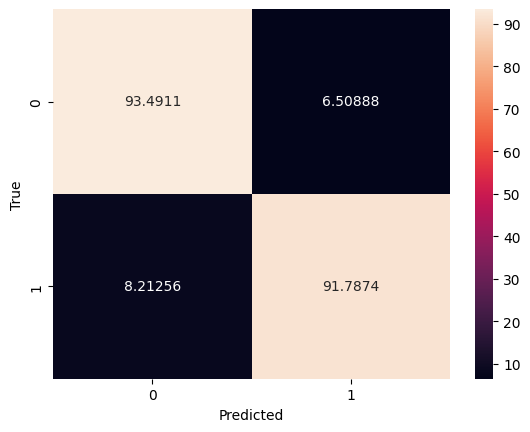

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       169
           1       0.95      0.92      0.93       207

    accuracy                           0.93       376
   macro avg       0.92      0.93      0.92       376
weighted avg       0.93      0.93      0.93       376

Test AUC: 0.926392819369408
Test Recall: 0.925531914893617
Test F1-score: 0.925531914893617
Test Precision: 0.925531914893617


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred_classes = np.round(y_pred_test)
Y_test_bin = np.argmax(Y_test_zm, axis=1)
Y_pred_bin =np.argmax(Y_pred_classes,axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test_bin, Y_pred_bin)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(cm_percentage, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
# Print classification report
print(classification_report(Y_test_bin, Y_pred_bin))

# Additional metrics
auc_score = roc_auc_score(Y_test_zm, Y_pred_classes, multi_class='ovr')
recall = recall_score(Y_test_bin, Y_pred_bin, average='micro')
f1 = f1_score(Y_test_bin, Y_pred_bin, average='micro')
precision = precision_score(Y_test_bin, Y_pred_bin, average='micro')

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

class_weights_list = []
for i in range(Y_train_zm.shape[1]):
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(Y_train_zm[:, i]),
        y=Y_train_zm[:, i]
    )
    class_weights_dict = dict(zip(np.unique(Y_train_zm[:, i]), class_weights))
    class_weights_list.append(class_weights_dict)

model_rf = RandomForestClassifier(class_weight=class_weights_list)

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

start_time = time.time()

grid_search.fit(X_train_zm, Y_train_zm)

end_time = time.time()
training_time = end_time - start_time
print("Training Time: {:.2f} seconds".format(training_time))

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred_train = best_model.predict(X_train_zm)
y_pred_test = best_model.predict(X_test_zm)

# Compute accuracy
train_accuracy = accuracy_score(Y_train_zm, y_pred_train)
test_accuracy = accuracy_score(Y_test_zm, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Training Time: 417.41 seconds
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.9767
Test Accuracy: 0.9628


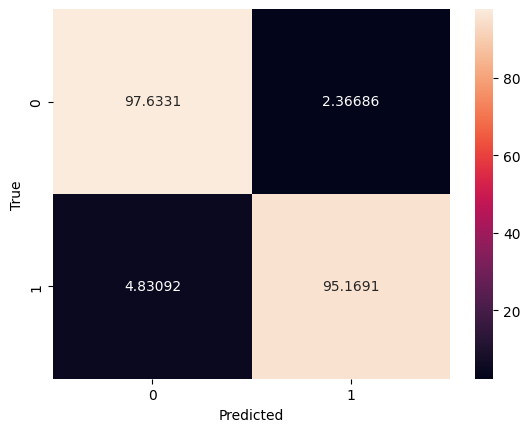

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       169
           1       0.98      0.95      0.97       207

    accuracy                           0.96       376
   macro avg       0.96      0.96      0.96       376
weighted avg       0.96      0.96      0.96       376

Test AUC: 0.964011091101392
Test Recall: 0.9627659574468085
Test F1-score: 0.9627659574468085
Test Precision: 0.9627659574468085


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred_classes = np.round(y_pred_test)
Y_test_bin = np.argmax(Y_test_zm, axis=1)
Y_pred_bin =np.argmax(Y_pred_classes,axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test_bin, Y_pred_bin)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

sns.heatmap(cm_percentage, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
# Print classification report
print(classification_report(Y_test_bin, Y_pred_bin))

# Additional metrics
auc_score = roc_auc_score(Y_test_zm, Y_pred_classes, multi_class='ovr')
recall = recall_score(Y_test_bin, Y_pred_bin, average='micro')
f1 = f1_score(Y_test_bin, Y_pred_bin, average='micro')
precision = precision_score(Y_test_bin, Y_pred_bin, average='micro')

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)